Paolo Toneguzzo


---



#Project 4: Insurance Policy Cross-Selling

## 1. IMPORTING THE DATASET AND FEATURES PRELIMINARY EXPLORATION
>The goal of this section is to conduct a preliminary examination of the dataset, including exploration of its contents and assessment of relationships between features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("/content/drive/MyDrive/insurance_cross_sell.csv", index_col = 0)

In [3]:
df.shape

(381109, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


>The dataset containing behavioral preferences in the insurance policy field contains *381,109 instances* and *11 features*, summarized below along with their variable types:

>1) Gender: Gender of the client - categorical nominal variable.

>2) Age: Age of the client - numerical continuous variable on ratio scale.

>3) Driving License: Ownership of a driving license (“1” for yes, “0” for no) - categorical nominal variable, numerically encoded.

>4) Region Code: Unambiguous code indicating the region where the client resides - categorical nominal variable, numerically encoded.

>5) Previously Insured: Indicates whether the client’s vehicle was previously insured (“1” for yes, “0” for no) - categorical nominal variable, numerically encoded.

>6) Vehicle Age: Age category of the client’s vehicle - categorical ordinal variable.

>7) Vehicle Damage: Indicates whether the client’s vehicle has sustained damage in the past - categorical nominal variable.

>8) Annual Premium: Annual amount of money paid by the client for the insurance policy - numerical continuous variable on a ratio scale.

>9) Policy Sales Channel: Communication channel used to contact the client during sales - categorical nominal variable, numerically encoded.

>10) Vintage: Number of days since the client signed the policy contract - numerical continuous variable on ratio scale.

>11) Response: Client’s response to the cross-selling policy offer (“1” for positive, “0” for negative) - categorical nominal variable, numerically encoded.

>It is worth noticing that none of the features contain null values. Therefore, data imputation procedures such as removing rows or substituting missing values with representative statistics (e.g., mean, median, or mode) were not required.

### 1.1. RESPONSE VARIABLE DISTRIBUTION

In [ ]:
RS = df['Response'].value_counts()
print(f"POSITIVE RESPONDERS: {RS[1]} ({(RS[1]/(RS.sum()))*100:.2f}%).")
print(f"NEGATIVE RESPONDERS: {RS[0]} ({(RS[0]/(RS.sum()))*100:.2f}%).")

POSITIVE RESPONDERS: 46710 (12.26%).
NEGATIVE RESPONDERS: 334399 (87.74%).


>>The Response variable is highly imbalanced, with negative responders making up 87.74% of the total, while only 12.26% of clients responded positively to the offer. This class imbalance will need to be addressed during model building to ensure fair and accurate predictions.

### 1.2. RELATIONSHIPS BETWEEN RESPONSE & OTHER FEATURES

>>Out of the 10 independent variables, 5 are categorical nominal features, each containing between 2 and 3 classes. Due to their substantial presence in the dataset, it is beneficial to create a dedicated Python class to examine their relationships with the Response variable. This approach helps reduce computational redundancy and streamlines the analysis code.

In [11]:
class cat_expl():
  ''' This class allows the exploration of "Response" relationship with another categorical nominal feature'''



  def __init__(self,feature):
    '''Class attribute:
    1) feature: a dataframe categorical feature'''

    self._feature = feature



  def freq_table(self):
    '''This method creates and returns a contingecy table showing
    combined frequency distributions of "Response" and the feature of interest'''

    freq_table = pd.crosstab(df['Response'], self._feature)
    return freq_table



  def feat_name(self):
    '''This method operates on the feature name's string. If an underscore
    symbol is found, it gets substituted by a blank space. It then returns the new string'''

    replaced_name = None
    if "_" in self._feature.name:
      replaced_name = self._feature.name.replace("_", " ")
    else:
      replaced_name = self._feature.name
    return replaced_name



  def tick_set(self):
    '''This method creates and returns a list containing the feature class labels'''

    tick_set_list = []
    for i in self._feature.unique():
        tick_set_list.append(i)
        tick_set_list.reverse()
    return tick_set_list



  def qual_perc(self):
    '''This method creates a string object for each of the feature classes which reports the
    number of positive responders and the related percentage. The object is then printed'''

    ft = self.freq_table().values
    ts = self.tick_set()

    for i in range(len(self._feature.unique())):
      print(f"The positive responders belonging to the {ts[i]} class of {self.feat_name()} are {ft[1,i]} out of {ft[1,i] + ft[0,i]} ({(ft[1,i]/(ft[1,i] + ft[0,i]))*100:.2f}%).")



  def qual_plots(self):
    '''This method plots 1) a heatmap elaborated from the contingency table; and
    2) a barplot showing the number of positive responders per feature class'''

    ft = self.freq_table().values
    ts = self.tick_set()

    plt.figure(figsize=(12, 4))

    plt.subplot(1,2,1)
    img = sns.heatmap(ft, annot = True, fmt='g',cbar = False)
    img.set_title(f"Heatmap representation of {self.feat_name()} classes \n in Cross-selling Policy Response", pad = 20)
    img.set_xlabel(f"{self.feat_name()}", labelpad = 14)
    img.set_ylabel("Responce to Cross-selling Policy",labelpad = 14)
    img.set_yticklabels(['No', 'Yes'])
    img.set_xticklabels(ts)

    plt.subplot(1,2,2)
    weight_counts = {"Yes": ft[1,:], "No": ft[0,:]}
    width = 0.4
    bottom = np.zeros(len(self._feature.unique()))

    for keys, values in weight_counts.items():
      a = plt.bar(ts, values, width, bottom = bottom)
      bottom += values
      plt.bar_label(a,label_type='edge')

    plt.xticks(ts, fontsize=12)
    plt.title(f"Bar Chart representation of {self.feat_name()} classes \n in cross-selling policy response", pad = 20)
    plt.xlabel(f"{self.feat_name()}", labelpad = 14)
    plt.ylabel("Response (counts)")
    plt.legend(["Positively Responded", "Negatively Responded"], loc = "center")
    plt.subplots_adjust(wspace= 0.5)



  def chis(self):
    '''This method computes and returns the Chi-square statistics between Response and the feature'''

    ft = self.freq_table().values
    return chi2_contingency(ft, correction = False)

#### 1.2.1. GENDER vs RESPONSE

In [12]:
GR = cat_expl(df['Gender'])

In [13]:
GR.qual_perc()

The positive responders belonging to the Female class of Gender are 18185 out of 175020 (10.39%).
The positive responders belonging to the Male class of Gender are 28525 out of 206089 (13.84%).


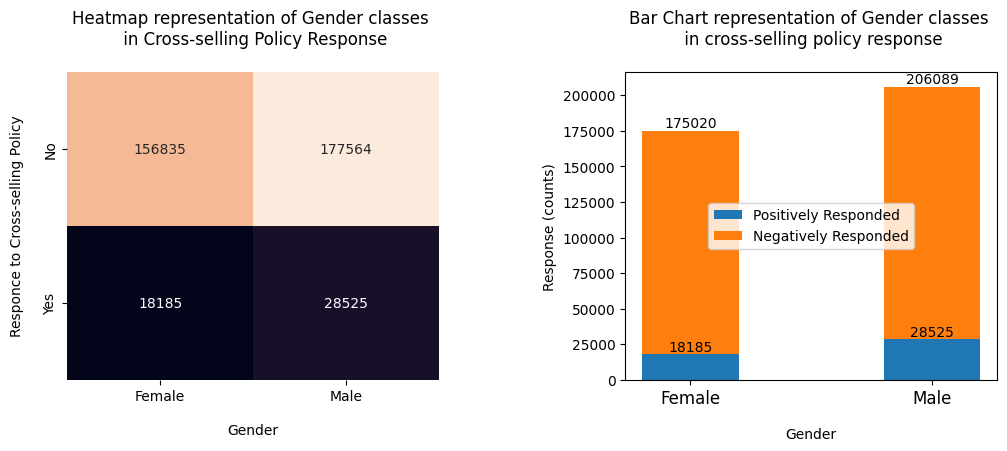

In [14]:
GR.qual_plots()

>>A chi-squared test can determine whether the observed distribution of categorical frequencies is due to random sampling variation or reflects a statistically significant relationship between the variables.

In [15]:
GR.chis()

Chi2ContingencyResult(statistic=np.float64(1048.0286199243903), pvalue=np.float64(6.528551393740323e-230), dof=1, expected_freq=array([[153568.9605336, 180830.0394664],
       [ 21451.0394664,  25258.9605336]]))

>>>As confirmed by the results of the chi-squared test, showing a substantial deviation between the expected and observed frequencies, there is a statistically significant association between client gender and response to the cross-selling policy. Specifically, only 18185 out of 175020 female clients accepted the offer (10.39%), compared to 28525 out of 206089 male clients (13.84%). This suggests that male clients may be more likely to enroll in the cross-selling policy compared to female clients.

#### 1.2.2. AGE vs RESPONSE

>>>Given that 3 out of 10 features are continuous numerical variables, it may be helpful to create a Python class for the sake of consistency and efficiency, following the same principles used for the categorical features.

In [16]:
df['Age'].describe()

,Age
count,381109.000000
mean,38.822584
std,15.511611
min,20.000000
25%,25.000000
50%,36.000000
75%,49.000000
max,85.000000


In [18]:
class num_expl():
  ''' This class allows the exploration of "Response" relationship with a numerical continuous feature'''



  def __init__(self,feature):
    '''Class attribute:
    1) feature: a dataframe categorical feature'''

    self._feature = feature



  def feat_name(self):
    '''This method creates and then returns a list containing the feature class labels'''

    replaced_name = None
    if "_" in self._feature.name:
      replaced_name = self._feature.name.replace("_", " ")
    else:
      replaced_name = self._feature.name
    return replaced_name



  def unit(self):
    '''This method asks to specify the unit of measurement
    of the feature and stores the information as a string'''

    unit = str(input("What is the unit of measurment of the feature?"))
    return unit



  def box(self):
    '''This method plots the boxplot comparison of the numerical feature
    showing two subgroups created according to "Response" class'''

    plt.figure(figsize = (8,8))
    img = sns.boxplot(data=df, x="Response", y = self._feature)
    img.set_title(f"Boxplot representation of Cross-selling Policy Response vs {self.feat_name()}", pad = 20)
    img.set_xlabel("Response", size = 10, labelpad = 14)
    img.set_ylabel(f"{self.feat_name()} ({self.unit()})",size = 10, labelpad = 14)
    img.set_xticklabels(['No', 'Yes'])



  def distr(self):
    '''This method computes and shows a distribution plot of the feature'''

    plt.figure()
    img = sns.displot(df,x = self._feature.name, kind="kde",bw_adjust=0.3)
    img.set_axis_labels(f"{self.feat_name()} ({self.unit()})")



  def SW(self):
    '''This method tests whether the feature distribution matches a normal distribution
    using the Shapiro-Wilk normality test'''

    return print(stats.shapiro(self._feature))



  def groups(self):
    '''This method allows the splitting of the feature in two subsets and stores them
     in a dictionary which is then returnedby the function. The splitting is carried out according to
     the "Response" variable class'''

    group_list = []
    a = df['Response'].unique()
    for i, val in enumerate(a):
      subset = df[df["Response"] == val]
      group_list.insert(i,subset)

    for ind,obj in enumerate(group_list):
      group_list[ind]= group_list[ind][self._feature.name].values

    return group_list



  def Lev(self):
    '''This method checks whether two subgroups have homogeneous variances using Levene's homoscedasticity test'''

    gyr,gnr = self.groups()
    return print(stats.levene(gyr, gnr))



  def tt(self):
    '''This method performs a t-test between two subgroups obtained by partitioning the numerical feature.
    If the homoscedasticity assumption is violated, the test adopted is the Welch's t-test.
    Furthermore, it allows the user to specify which alternative implement among 'two-sided', 'less', or 'greater'''

    alt = str(input("What method of comparison would you like to implement?"))
    gyr,gnr = self.groups()
    L,p = stats.levene(gyr,gnr)
    ev = False if p < 0.5 else True
    return print(stats.ttest_ind(gyr, gnr, alternative = alt, equal_var = ev))

In [19]:
AR = num_expl(df['Age'])

>>>To determine whether the distribution of Age differs significantly between positive and negative responders to the cross-selling offer, a t-test is an appropriate statistical tool. However, before proceeding, it is essential to examine the properties of the Age variable, specifically its distribution and variance across groups, to assess whether the assumptions of a standard t-test are met.

What is the unit of measurment of the feature?year


<Figure size 640x480 with 0 Axes>

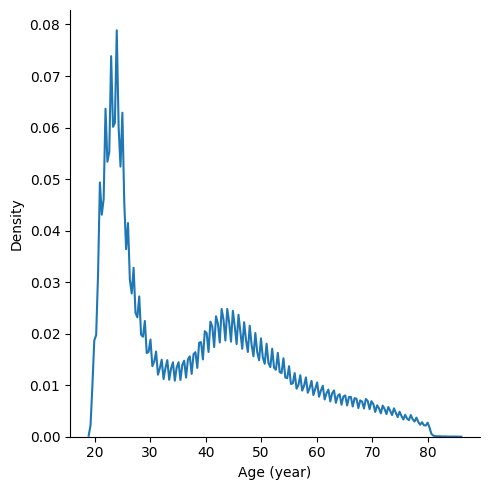

In [20]:
AR.distr()

In [21]:
AR.SW()

ShapiroResult(statistic=np.float64(0.91017768500043), pvalue=np.float64(5.329840656194579e-136))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 381109.
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
df['Age'].groupby(df['Response']).mean()

,Age
Response,
0,38.178227
1,43.435560


In [23]:
df['Age'].groupby(df['Response']).median()

,Age
Response,
0,34.0
1,43.0


What is the unit of measurment of the feature?year


/tmp/ipython-input-977501191.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  img.set_xticklabels(['No', 'Yes'])


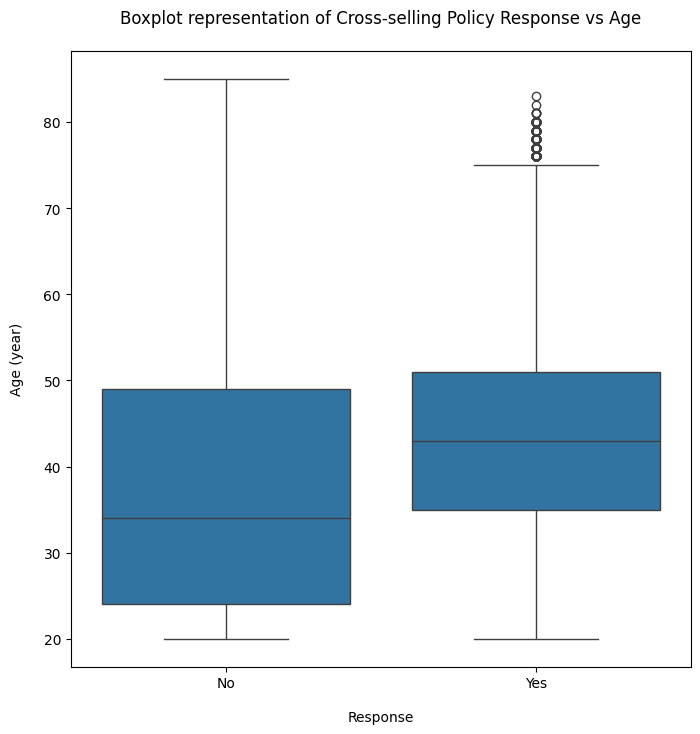

In [24]:
AR.box()

>>>"Age" distribution does not follow a normal curve, as indicated by the Shapiro-Wilk test results. Since this test is very sensitive to small deviations from normality, it is also useful to visually inspect the distribution. As shown above, Age clearly deviates from a Gaussian curve. However, according to the Central Limit Theorem, for large sample sizes, the distribution of a sample estimator (such as the mean) approximates a Gaussian distribution, regardless of the population distribution. Given that the dataset contains 381,109 entries, it is reasonable to proceed with parametric tests like the t-test, relying on the Central Limit Theorem. Next, the homogeneity of variance between the two subsets is going to be evaluated.


In [25]:
AR.Lev()

LeveneResult(statistic=np.float64(6641.076471407508), pvalue=np.float64(0.0))


>>>The homoscedasticity assumption is not satisfied. Therefore, Welch’s t-test is an appropriate choice, as it does not require equal variances between groups.

>>>According to the boxplot visualization and the statistical comparison based on the "Response" class, negative responders exhibit lower median and mean age values compared to positive responders.

In [26]:
AR.tt()

What method of comparison would you like to implement?less
TtestResult(statistic=np.float64(83.98779124258638), pvalue=np.float64(1.0), df=np.float64(70801.80359859296))


>>> There is not a significative difference between the two subsets built starting from the cross-selling policy offer response (p = 1.0), indicating that age might not represent a relevant factor in predicting clients response.

#### 1.2.3. DRIVING LICENSE vs RESPONSE

>>> "Driving License" is "1" if the clients has already acquired the driving License, else is equal to "0".

In [27]:
DR = cat_expl(df['Driving_License'])

In [28]:
DR.qual_perc()

The positive responders belonging to the 0 class of Driving License are 41 out of 812 (5.05%).
The positive responders belonging to the 1 class of Driving License are 46669 out of 380297 (12.27%).


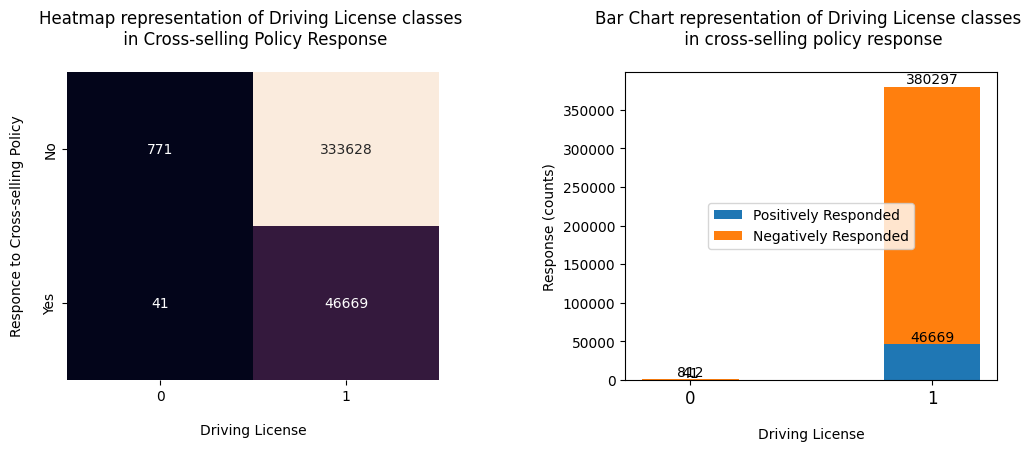

In [29]:
DR.qual_plots()

>>>From a conceptual standpoint, it is easy to understand that individuals without a driving license are unlikely to seek or subscribe to an insurance policy. In fact, the dataset contains 812 individuals without a license versus 380,297 with a license. Given this extreme class imbalance, the Driving License feature is likely to provide very little information regarding clients’ behavior toward the cross-selling policy.

#### 1.2.4. REGION CODE vs RESPONSE

In [30]:
RC_val = df["Region_Code"].unique()
RC_val

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [31]:
np.sort(RC_val)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52.])

In [32]:
len(RC_val)

53

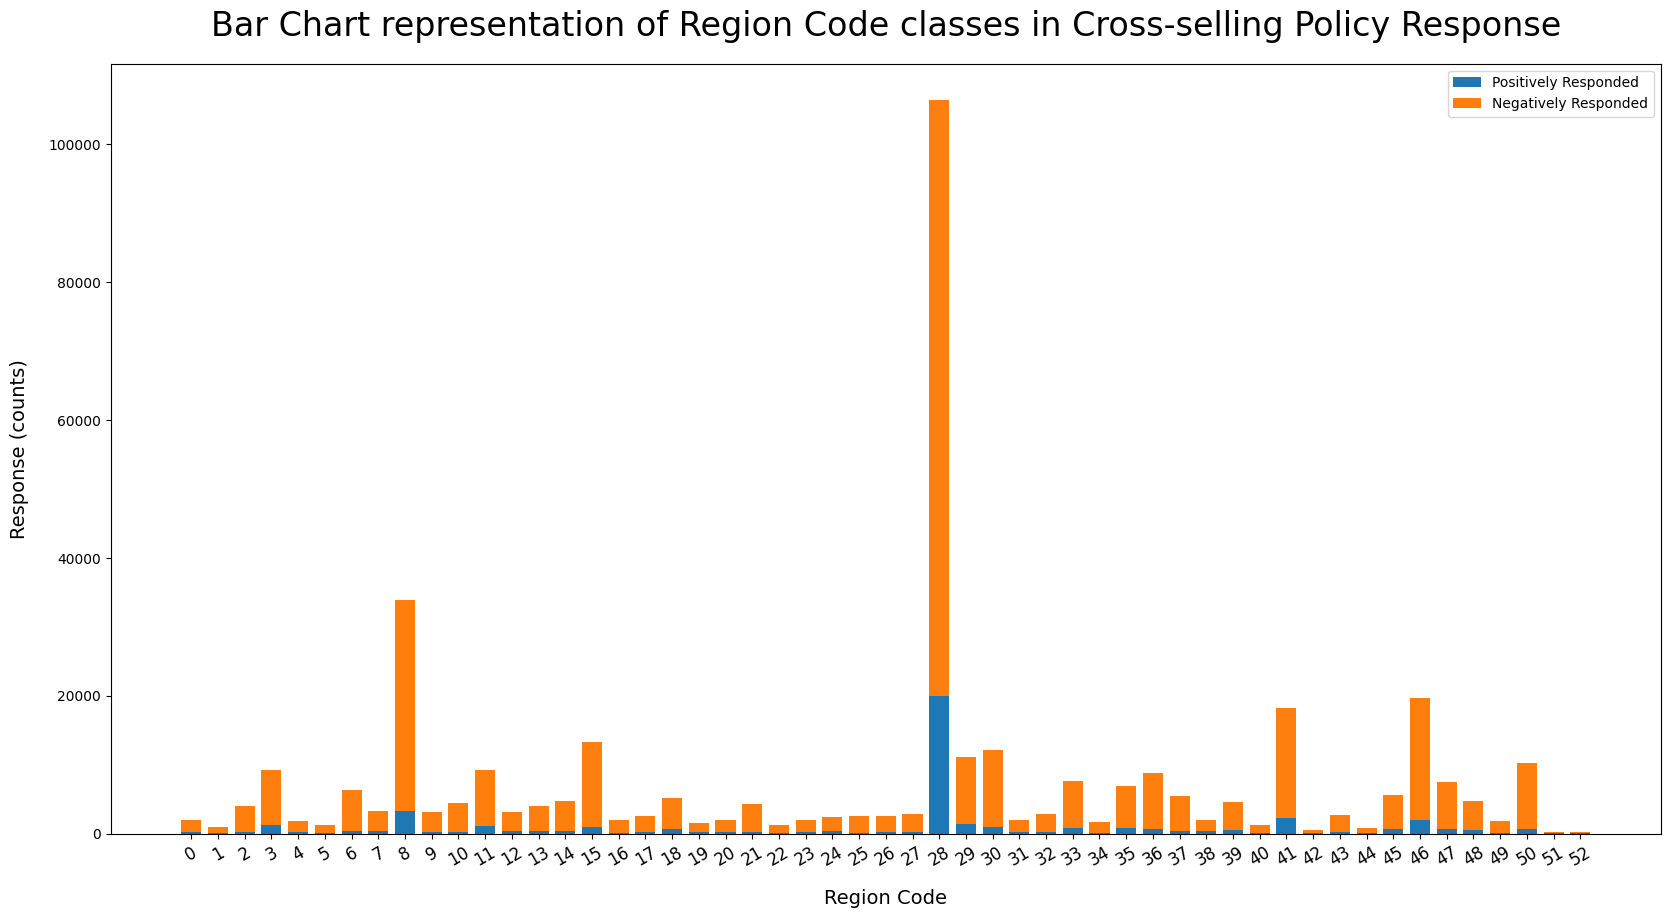

In [33]:
feat = df['Region_Code']

replaced_name = None
if "_" in feat.name:
  replaced_name = feat.name.replace("_", " ")
else:
  replaced_name = feat.name

lab = feat.unique()
ft = pd.crosstab(df['Response'], feat).values
weight_counts = {"Yes": ft[1,:], "No": ft[0,:]}
width = 0.75
bottom = np.zeros(len(lab))
ts = np.sort(lab)

plt.figure(figsize = (20,10))
for keys, values in weight_counts.items():
      a = plt.bar(ts, values, width, bottom = bottom)
      bottom += values

plt.xticks(ts, fontsize=12, rotation = 30)
plt.title(f"Bar Chart representation of {replaced_name} classes in Cross-selling Policy Response", pad = 20,size = 24)
plt.xlabel(f"{replaced_name}", labelpad = 14, size = 14)
plt.ylabel("Response (counts)", labelpad = 14, size = 14)
plt.legend(["Positively Responded", "Negatively Responded"], loc = "upper right")

In [34]:
ft = pd.crosstab(df['Response'], df['Region_Code']).values
chi2_contingency(ft, correction = False)

Chi2ContingencyResult(statistic=np.float64(7267.842468803052), pvalue=np.float64(0.0), dof=52, expected_freq=array([[1.77329945e+03, 8.84456132e+02, 3.54308915e+03, 8.11716635e+03,
        1.58026339e+03, 1.12224146e+03, 5.51030209e+03, 2.87711474e+03,
        2.97249210e+04, 2.72093102e+03, 3.83790786e+03, 8.10049505e+03,
        2.80604237e+03, 3.54133427e+03, 4.10464860e+03, 1.16769268e+04,
        1.76101533e+03, 2.29625168e+03, 4.52143100e+03, 1.34686524e+03,
        1.69783990e+03, 3.74314470e+03, 1.14856456e+03, 1.71977581e+03,
        2.11900948e+03, 2.19622391e+03, 2.26992858e+03, 2.47700363e+03,
        9.33724199e+04, 9.70883641e+03, 1.06968301e+04, 1.71977581e+03,
        2.44541591e+03, 6.71590003e+03, 1.46005457e+03, 6.09116515e+03,
        7.71881011e+03, 4.82677895e+03, 1.77768663e+03, 4.07481575e+03,
        1.13628045e+03, 1.60246253e+04, 5.18565054e+02, 2.31555529e+03,
        7.08968804e+02, 4.91803236e+03, 1.73284962e+04, 6.52461885e+03,
        4.10728091e+03, 1.6

>>>The Chi-squared test results (p < $1 ⋅ 10^{-300}$) indicate a statistically significant association between the Response to the cross-selling policy and the Region in which clients reside, suggesting that these variables are not independent.

#### 1.2.5. PREVIOUSLY INSURED vs RESPONSE

>>>"Previously Insured" is "1" if the clients has already an active insurance, else is equal to "0".

In [35]:
PIR = cat_expl(df['Previously_Insured'])

In [36]:
PIR.qual_perc()

The positive responders belonging to the 1 class of Previously Insured are 46552 out of 206481 (22.55%).
The positive responders belonging to the 0 class of Previously Insured are 158 out of 174628 (0.09%).


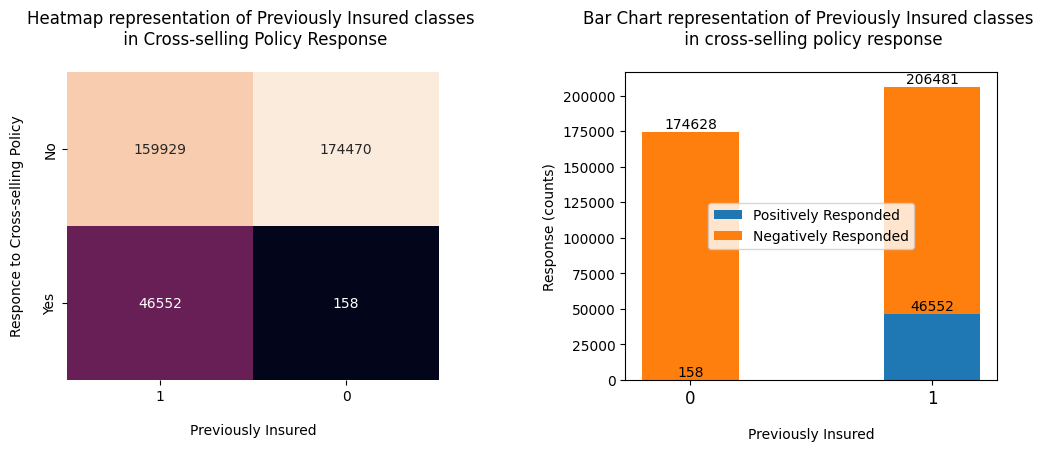

In [37]:
PIR.qual_plots()

In [38]:
PIR.chis()

Chi2ContingencyResult(statistic=np.float64(44360.05272134923), pvalue=np.float64(0.0), dof=1, expected_freq=array([[181173.99462883, 153225.00537117],
       [ 25307.00537117,  21402.99462883]]))

>>>A p-value smaller than $1⋅10^{-300}$ indicates a highly significant association between the Response to the cross-selling policy and the client's prior subscription to an insurance policy. Specifically, only 158 out of 17428 clients without previous insurance responded positively to the offer (0.91%), compared to 46552 out of 206,481 existing clients (22.55%). These figures highlight how the likelihood of accepting the cross-selling offer is strongly influenced by having an active insurance policy.

#### 1.2.6. VEHICLE AGE vs RESPONSE

In [39]:
VAR = cat_expl(df['Vehicle_Age'])

In [40]:
VAR.qual_perc()

The positive responders belonging to the < 1 Year class of Vehicle Age are 34806 out of 200316 (17.38%).
The positive responders belonging to the > 2 Years class of Vehicle Age are 7202 out of 164786 (4.37%).
The positive responders belonging to the 1-2 Year class of Vehicle Age are 4702 out of 16007 (29.37%).


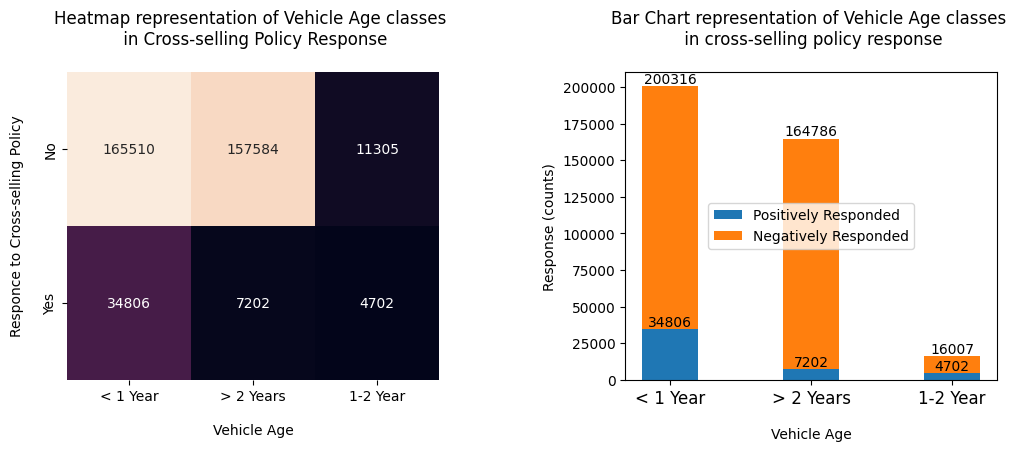

In [ ]:
VAR.qual_plots()

In [41]:
VAR.chis()

Chi2ContingencyResult(statistic=np.float64(18771.889904151052), pvalue=np.float64(0.0), dof=2, expected_freq=array([[175764.59775025, 144589.27397149,  14045.12827826],
       [ 24551.40224975,  20196.72602851,   1961.87172174]]))

>>>Once again, the result of the Chi-squared test ($p < 1\cdot10^{-300}$) indicates a significant association between the Response to the cross-selling policy and the vehicle age. Analyzing the three categories of this feature reveals notable differences in participation rates: only 7202 out of 164786 clients (4.37%) with vehicles older than 2 years accepted the double-policy offer. In contrast, higher response rates were observed considering owners of newer vehicles: 4702 out of 16007 (29.37%) among those with vehicles aged between 1 and 2 years, and 34806 out of 200316 (17.38%) among those whose vehicles were purchased less than 1 year ago. These results suggest that clients with more recently acquired vehicles (0–2 years old) are significantly more inclined to accept the cross-selling offer compared to owners of older vehicles.

#### 1.2.7. VEHICLE DAMAGE vs RESPONSE

In [42]:
VDR = cat_expl(df['Vehicle_Damage'])

In [43]:
VDR.qual_perc()

The positive responders belonging to the No class of Vehicle Damage are 982 out of 188696 (0.52%).
The positive responders belonging to the Yes class of Vehicle Damage are 45728 out of 192413 (23.77%).


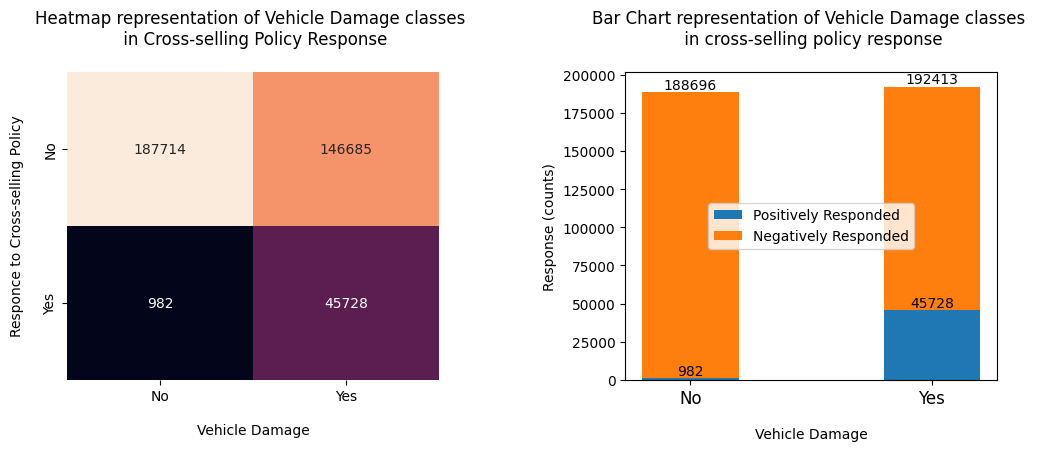

In [44]:
VDR.qual_plots()

In [45]:
VDR.chis()

Chi2ContingencyResult(statistic=np.float64(47866.92327853048), pvalue=np.float64(0.0), dof=1, expected_freq=array([[165568.78400668, 168830.21599332],
       [ 23127.21599332,  23582.78400668]]))

>>> It comes as no surprise that "Vehicle Damage" is significantly associated with response to the cross-selling offer ( $p < 1 \cdot 10^{-300}$). Only 982 out of 188696 (0.52%) clients with undamaged vehicles accepted the offer, compared to 45728 out of 192413 (23.77%) of those who had previously experienced vehicle damage. This sharp contrast suggests that past damage may play a key role in clients' willingness to purchase additional coverage.


#### 1.2.8. ANNUAL PREMIUM vs RESPONSE

In [46]:
APR = num_expl(df['Annual_Premium'])

In [47]:
df['Annual_Premium'].describe()

,Annual_Premium
count,381109.000000
mean,30564.389581
std,17213.155057
min,2630.000000
25%,24405.000000
50%,31669.000000
75%,39400.000000
max,540165.000000


What is the unit of measurment of the feature?amount


<Figure size 640x480 with 0 Axes>

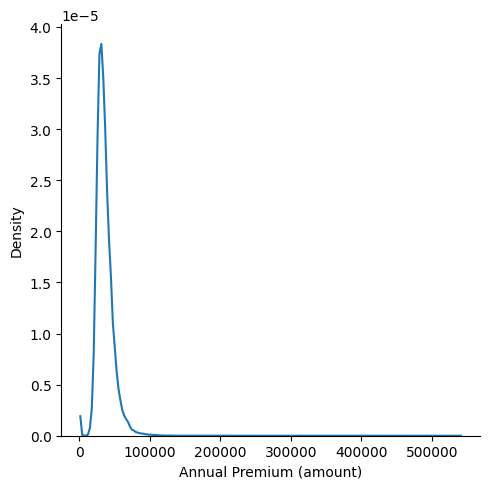

In [48]:
APR.distr()

In [49]:
APR.SW()

ShapiroResult(statistic=np.float64(0.8733076293840272), pvalue=np.float64(1.0038435350297132e-146))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 381109.
  res = hypotest_fun_out(*samples, **kwds)


>>>The Shapiro–Wilk test for normality returns a statistically significant result ($p = 1 \cdot 10^{-146}$), indicating a departure from normality.

What is the unit of measurment of the feature?amount


/tmp/ipython-input-977501191.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  img.set_xticklabels(['No', 'Yes'])


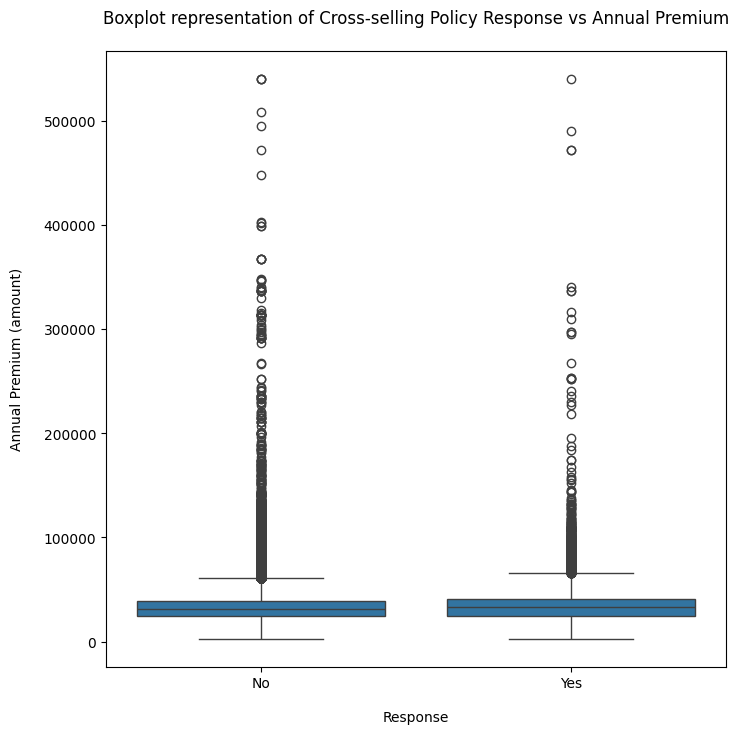

In [50]:
APR.box()

In [51]:
df['Annual_Premium'].groupby(df['Response']).mean()

,Annual_Premium
Response,
0,30419.160276
1,31604.092742


In [52]:
df['Annual_Premium'].groupby(df['Response']).median()

,Annual_Premium
Response,
0,31504.0
1,33002.0


>>According to the boxplot visualization and the statistical comparison based on the "Response" class, negative responders exhibit lower median and mean annual premium values compared to positive responders.

In [53]:
APR.Lev()

LeveneResult(statistic=np.float64(314.4348353611601), pvalue=np.float64(2.520447176451392e-70))


>>> The results of Levene's test ( $p=2.5 \cdot 10^{-70}$) indicate that homoscedasticity condition is not met.

In [54]:
APR.tt()

What method of comparison would you like to implement?less
TtestResult(statistic=np.float64(13.00029465440363), pvalue=np.float64(1.0), df=np.float64(58073.128205263776))


>>> The Welch t-test results in a non significative difference between the two subsets built according to the cross-selling policy offer response  ($p = 1.0$).

#### 1.2.9. POLICY SALES CHANNEL vs RESPONSE

In [55]:
PSV = df['Policy_Sales_Channel'].unique()

In [56]:
PSV

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [57]:
np.sort(PSV)

array([  1.,   2.,   3.,   4.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  73.,  74.,  75.,  76.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
       115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 143., 144., 145., 146., 147., 148., 149.,
       150., 151., 152., 153., 154., 155., 156., 15

In [58]:
len(PSV)

155

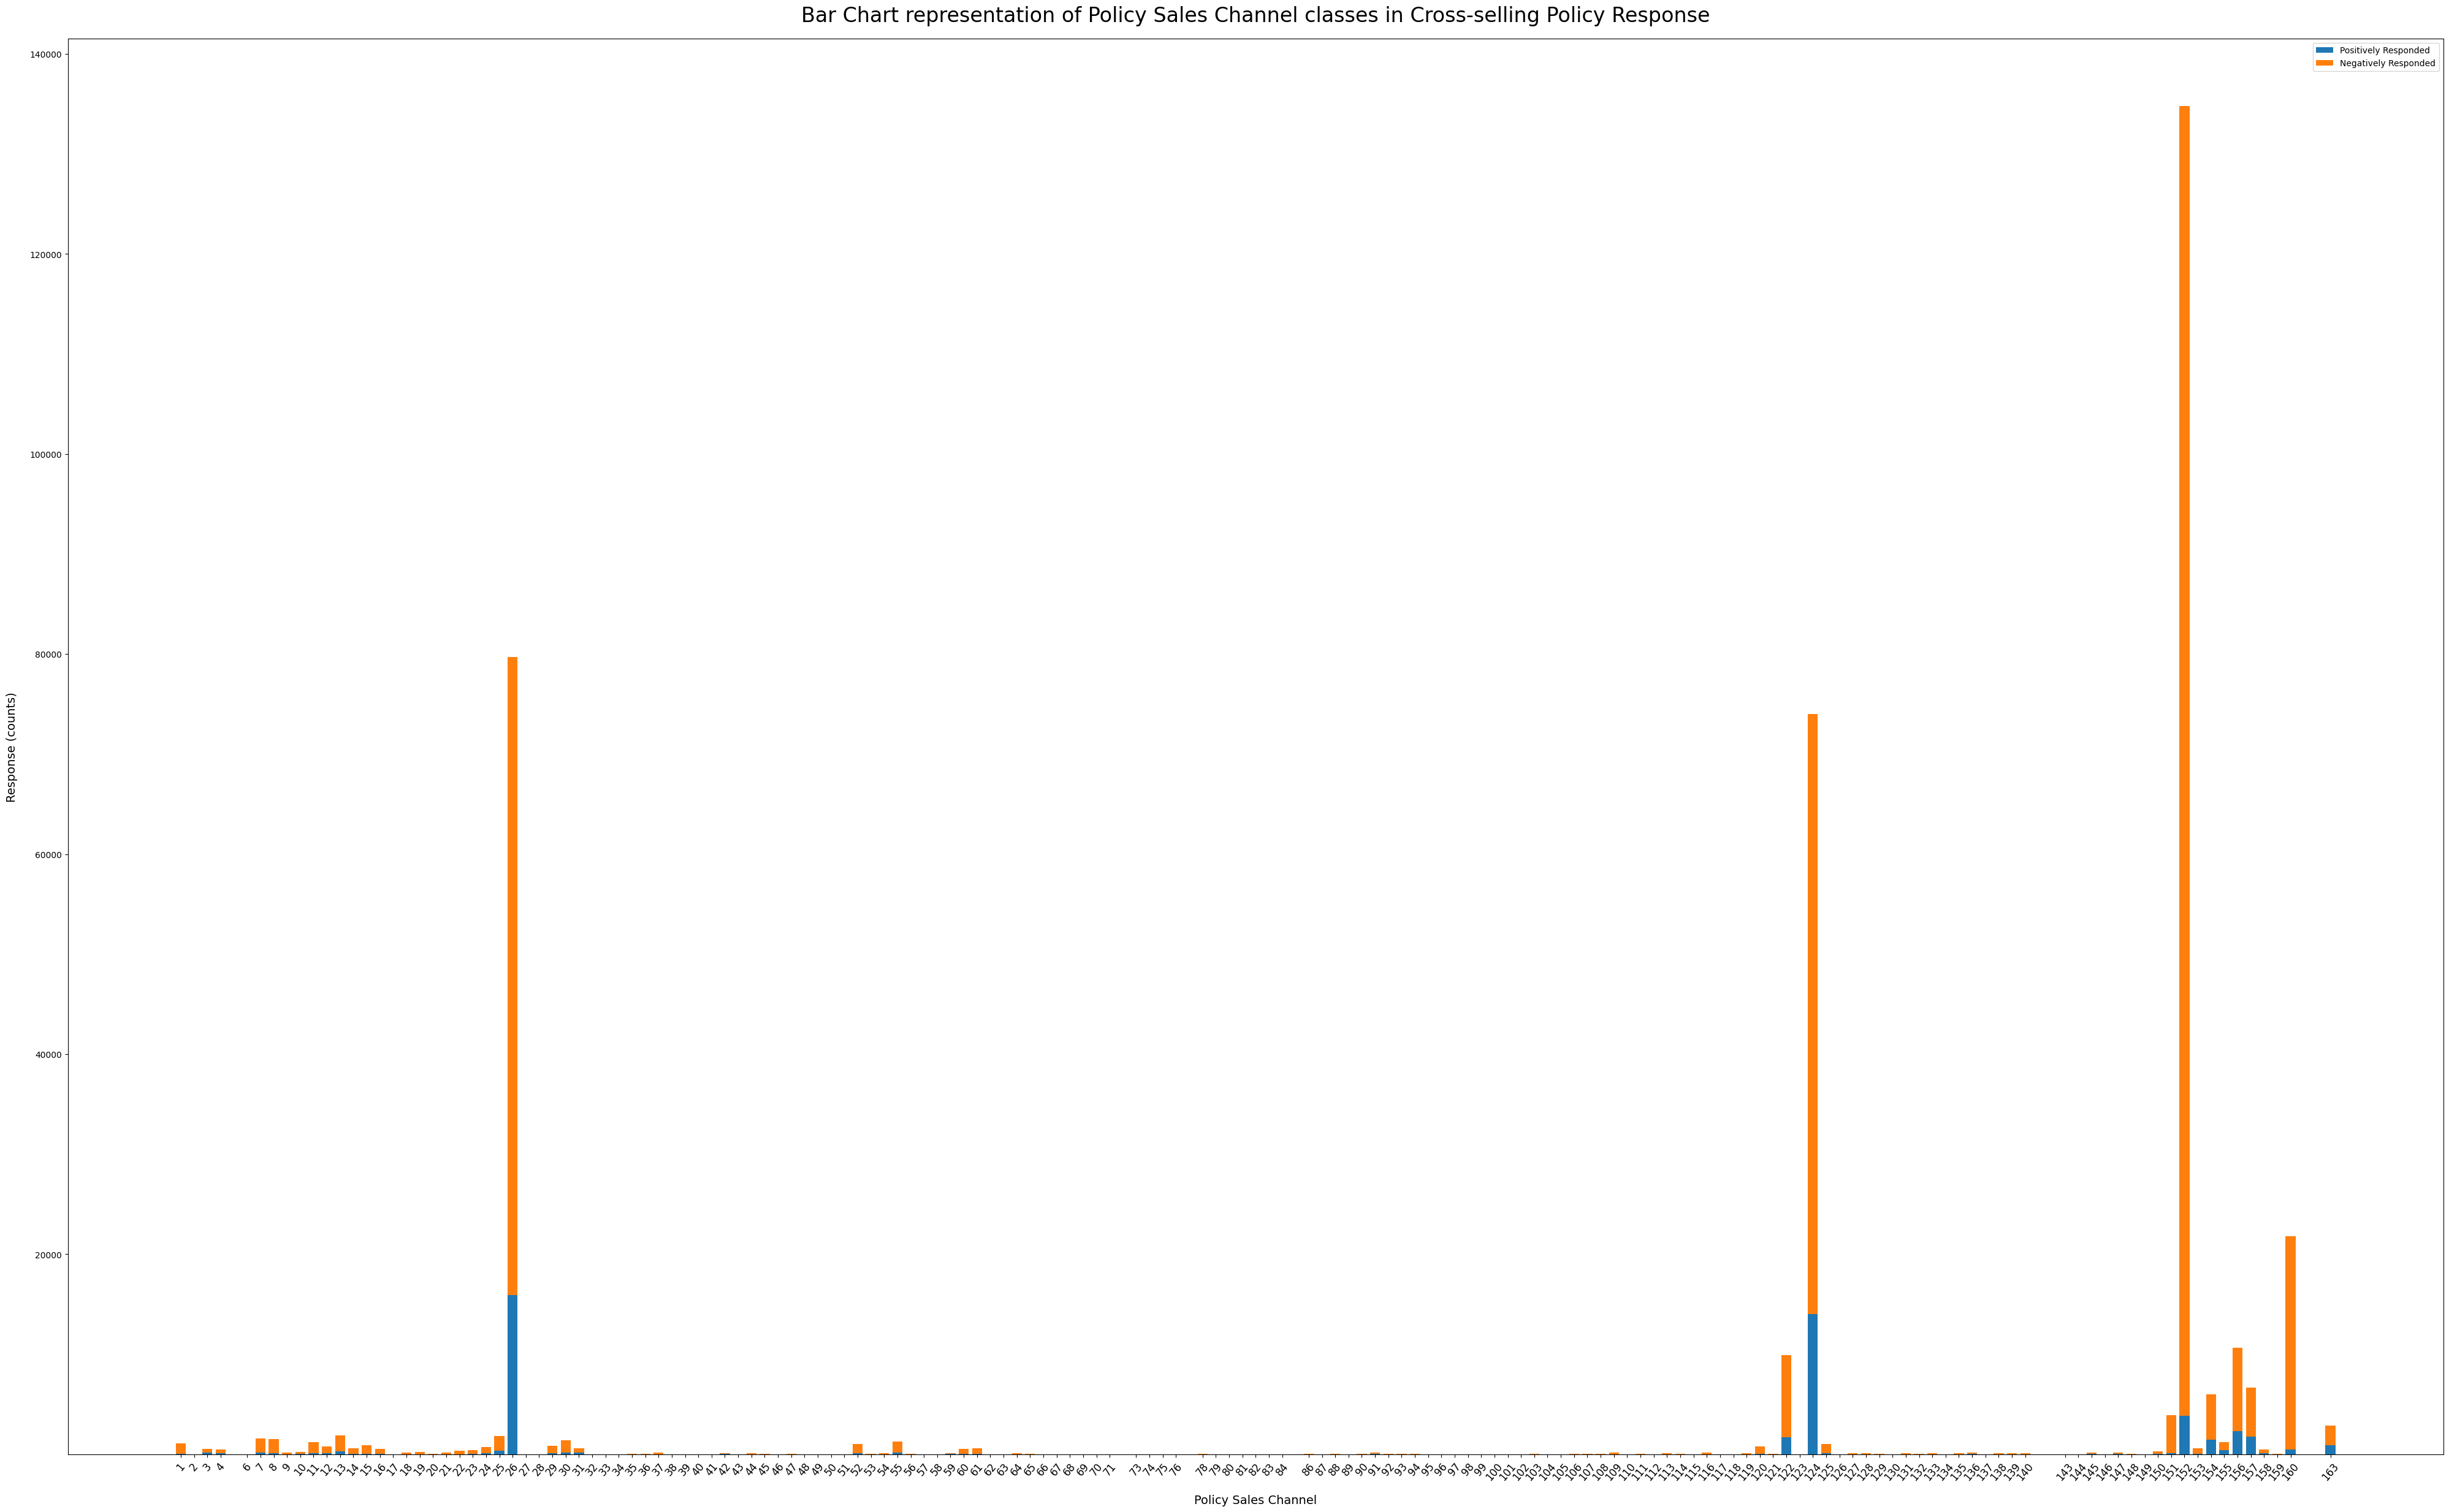

In [59]:
feat = df['Policy_Sales_Channel']

replaced_name = None
if "_" in feat.name:
  replaced_name = feat.name.replace("_", " ")
else:
  replaced_name = feat.name

lab = feat.unique()
ft = pd.crosstab(df['Response'], feat).values
weight_counts = {"Yes": ft[1,:], "No": ft[0,:]}
width = 0.75
bottom = np.zeros(len(lab))
ts = np.sort(lab)

plt.figure(figsize = (50,30))
for keys, values in weight_counts.items():
  a = plt.bar(ts, values, width, bottom = bottom)
  bottom += values

plt.xticks(ts, fontsize=12, rotation = 50)
plt.title(f"Bar Chart representation of {replaced_name} classes in Cross-selling Policy Response", pad = 20,size = 24)
plt.xlabel(f"{replaced_name}", labelpad = 14, size = 14)
plt.ylabel("Response (counts)", labelpad = 14, size = 14)
plt.legend(["Positively Responded", "Negatively Responded"], loc = "upper right")

In [60]:
ft = pd.crosstab(df['Response'], df['Policy_Sales_Channel']).values
chi2_contingency(ft, correction = False)

Chi2ContingencyResult(statistic=np.float64(26447.0328567449), pvalue=np.float64(0.0), dof=154, expected_freq=array([[9.42366950e+02, 3.50974656e+00, 4.58899362e+02, 4.46615249e+02,
        2.63230992e+00, 1.40214375e+03, 1.32931651e+03, 1.48286792e+02,
        2.31643273e+02, 1.05555628e+03, 6.87032888e+02, 1.63641933e+03,
        5.45765589e+02, 7.79163735e+02, 4.58899362e+02, 1.40389862e+01,
        1.46531919e+02, 1.94790934e+02, 2.36907892e+01, 1.29860623e+02,
        2.91308964e+02, 3.70278262e+02, 6.58077479e+02, 1.62150291e+03,
        6.99317001e+04, 2.63230992e+00, 2.63230992e+00, 7.39679087e+02,
        1.23718566e+03, 5.53662519e+02, 1.84261694e+01, 2.63230992e+00,
        2.63230992e+00, 6.58077479e+01, 4.56267052e+01, 1.33370369e+02,
        8.77436639e+00, 8.77436639e+00, 1.31615496e+01, 8.77436639e-01,
        1.15821636e+02, 8.77436639e-01, 8.86211005e+01, 4.12395220e+01,
        1.40389862e+01, 5.52785082e+01, 1.75487328e+01, 1.22841129e+01,
        1.75487328e+00, 1.0

>>>Upon examining the association between Policy Sales Channel and Response, the Chi-squared test ($p < 1 \cdot 10^{-300}$) indicates a statistically significant, non-independent relationship between the two variables.

### 1.2.10. VINTAGE vs RESPONSE

In [61]:
df['Vintage'].describe()

,Vintage
count,381109.000000
mean,154.347397
std,83.671304
min,10.000000
25%,82.000000
50%,154.000000
75%,227.000000
max,299.000000


In [62]:
VR = num_expl(df['Vintage'])

In [63]:
VR.SW()

ShapiroResult(statistic=np.float64(0.9548895377997788), pvalue=np.float64(9.200100034124278e-116))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 381109.
  res = hypotest_fun_out(*samples, **kwds)


What is the unit of measurment of the feature?day


<Figure size 640x480 with 0 Axes>

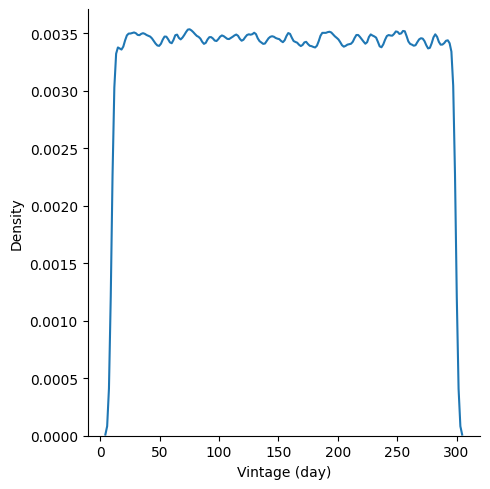

In [64]:
VR.distr()

>>>"Vintage" distribution clearly deviates from a normal distribution.

What is the unit of measurment of the feature?day


/tmp/ipython-input-977501191.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  img.set_xticklabels(['No', 'Yes'])


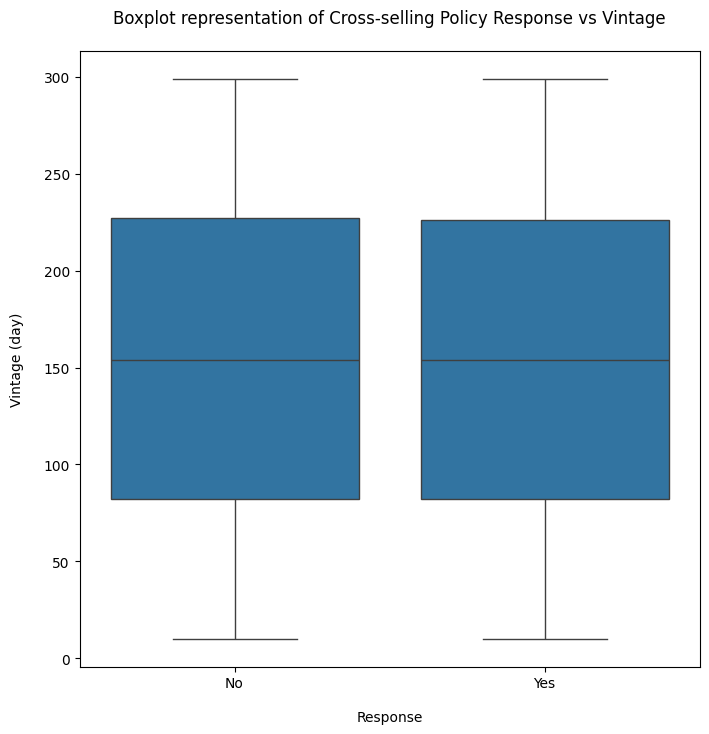

In [65]:
VR.box()

In [66]:
df['Vintage'].groupby(df['Response']).mean()

,Vintage
Response,
0,154.380243
1,154.112246


In [67]:
df['Vintage'].groupby(df['Response']).median()

,Vintage
Response,
0,154.0
1,154.0


>>>According to the boxplot visualization and the statistical comparison based on the "Response" class, negative responders exhibit similar mean and equal median "Vintage" values compared to positive responders.

In [68]:
VR.Lev()

LeveneResult(statistic=np.float64(0.011226229311164487), pvalue=np.float64(0.915618983034847))


>>>Being homoscedasticity proven by the Levine's test results ($p = 0.91$), it is possible to adopt of the standard Student's t-test.

In [69]:
VR.tt()

What method of comparison would you like to implement?two-sided
TtestResult(statistic=np.float64(-0.6484355839371397), pvalue=np.float64(0.5167036521412091), df=np.float64(381107.0))


>>>From the t-test results, it seems that time passed from subscription and cross-selling policy response are not significatively associated ($p = 0.516$).

## 2. Model Construction

### 2.1. PRELIMINARY STEPS & THEORETICAL CONSIDERATIONS

In [70]:
df = pd.read_csv("/content/drive/MyDrive/insurance_cross_sell.csv", index_col = 0)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [71]:
pip install imbalanced-learn

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

In [73]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision_recall=True):

  cm = confusion_matrix(y_true, y_pred) # tn, fp, fn, tp

  df_cm = pd.DataFrame(cm, index = labels,
                    columns = ["Predicted "+labels[0],"Predicted "+labels[1]])
  sns.heatmap(df_cm, annot=True, fmt='g') # avoid scientific representation of number

  if show_precision_recall:
    # Quale percentuale di classificazione positive erano effettivamente positive ?
    plt.text(0, -0.1, f"Precision: {(cm[1][1]/(cm[1][1]+cm[0][1])):.3f}")
    # Quale percentuale di osservazioni positive sono state classificate come positive ?
    plt.text(1, -0.1, f"Recall: {(cm[1][1]/(cm[1][1]+cm[1][0])):.3f}")

>>The dependent variable Response is a categorical nominal feature, making this a typical binary classification problem. Logistic Regression is a suitable modeling choice due to its probabilistic formulation, which maps any real-valued input to a range between 0 and 1. Mathematically, it is defined as </br>
$ y = 1/(1+e^z)$. </br>
where $z$ represents a linear combination of the predictors. This property makes Logistic Regression ideal for estimating the probability that an observation belongs to a particular class.

>> The ongoing operation will follow gold-standard principles for Machine Learning model elaboration:

>>1) **Feature Selection**: Despite some features turning out being unifluential according to the exploratory analysis, the model will include all of them, at least during the initial phases. If any of them is found to be negatively influencing model performances or generalizability, reguralization will be applied to mitigate their effect.

>>2) **Overfitting & Cross-Validation**: Overfitting occurs when a model fits the training data too closely, capturing noise rather than underlying patterns. As a result, the model performs well on the training set but fails to generalize to new, unseen data, effectively memorizing rather than learning from the dataset. In practical terms, overfitting is likely when a model is trained and evaluated solely on the same dataset without an independent validation procedure. K-Folds Cross-validation provides a robust way to mitigate this risk by partitioning the dataset into n subsets (folds). The model is trained on n–1 folds and tested on the remaining one, iteratively rotating which subset serves as the test fold. This process is repeated n times, ensuring that every observation is used for both training and testing. This method can be used when different models or preprocessing steps are compared, by assigning each condition to a different fold.

>>3) **Feature Encoding**: Categorical features of nominal or ordinal nature must be converted into numerical representations before being processed by a model. It is crucial that feature encoding takes place within the cross-validation loop to prevent *Data Leakage*,a situation in which the model gains access to information derived from the full dataset rather than the training fold alone. If encoding is performed before splitting, the encoder learns the mapping from all available data, including the test folds, thereby exposing the model to information it should not have during training. In contrast, when encoding is carried out inside the cross-validation loop, class labels are learned independently within each fold, ensuring that the model remains blind to unseen data and that performance estimates remain valid and unbiased.

>>4) **Standardization**: It is the conversion of numerical features to a standard scale before model training. This process prevents features with higher variability from biasing the model. For the same reason discussed above, standardization must occur separately within each cross-validation fold.

>>5) **Resampling** & **Class Weight manipulation**: Due to the pronounced imbalance of the response variable, where only 12.26% of clients responded positively to the cross-selling offer compared to 87.74% who declined, two main strategies can be employed. The first is resampling, which involves manipulating the number of observations to counteract the skewed class distribution. Three main approaches exist: (a) oversampling the minority class, (b) undersampling the majority class, and (c) a hybrid approach that combines both. While oversampling may increase the risk of overfitting, undersampling can result in the loss of potentially valuable information. As with other preprocessing steps, resampling must be applied separately within each training fold to avoid data leakage. The second strategy involves adjusting model behavior directly via the class_weight parameter, which instructs the Logistic Regression algorithm to account for class imbalance (e.g., using class_weight='balanced').

>>6) **Precision-Recall Curve**: The Precision–Recall (PR) curve can be adopted for model evaluation because it provides a more informative assessment than the ROC curve in the presence of class imbalance. In imbalanced datasets, the number of True Negatives (TN) is typically very high, which keeps the False Positive Rate (FPR) artificially low and can lead to overly optimistic ROC results (FPR = FP/(TN+FP)). In contrast, Precision focuses directly on the performance of the positive class, offering a more reliable indication of the model’s ability to identify true positives under skewed class distributions.

###2.2. MODELLING PHASE

In [74]:
X = df.drop('Response', axis=1)
y = df['Response']

>>First, the dataset is split into a training and a test set using a 70-30% ratio. The larger portion (70%) is used to find the best iteration between model condition and strategy. Specifically, K-Fold Cross-Validation will be applied exclusively to the training set and each fold will be used to evaluate the best condition possible among:

>>1) Oversampled and not corrected with class_weight = 'balanced' argument;
>>2) Oversampled and corrected with class_weight = 'balanced' argument;
>>3) Not oversampled and not corrected with class_weight = 'balanced' argument;
>>4) Not oversampled and corrected with class_weight = 'balanced' argument;

>>Once the best model is found, it will then be tested on the remaining 30% of unseen data. Following these steps ensures a proper and robust validation process while preventing data leakage throughout model development.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [76]:
oversample = RandomOverSampler(sampling_strategy = 0.5, random_state = 42)

In [77]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [78]:
skf.get_n_splits(X_train,y_train)

4

In [79]:
skf.split(X_train,y_train)

<generator object _BaseKFold.split at 0x7bb8eef20ae0>

/tmp/ipython-input-7760272.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[cols_to_scale] = X_val[cols_to_scale].astype(float)



FOLD number 1 Oversampled Not Balanced

TRAIN REPORT 1
              precision    recall  f1-score   support

           0       0.98      0.59      0.74    175653
           1       0.54      0.98      0.70     87826

    accuracy                           0.72    263479
   macro avg       0.76      0.78      0.72    263479
weighted avg       0.84      0.72      0.72    263479

The Log Loss function of the training set corresponds to 0.4296600022366447



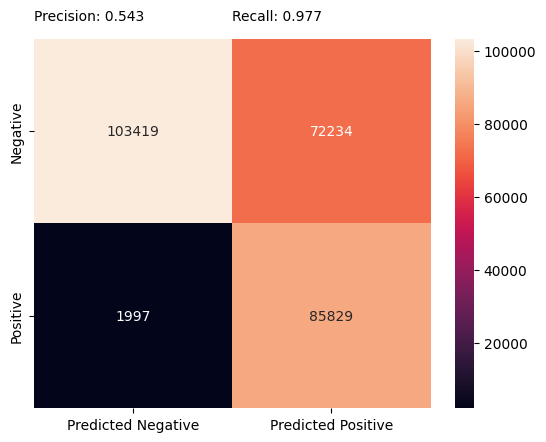

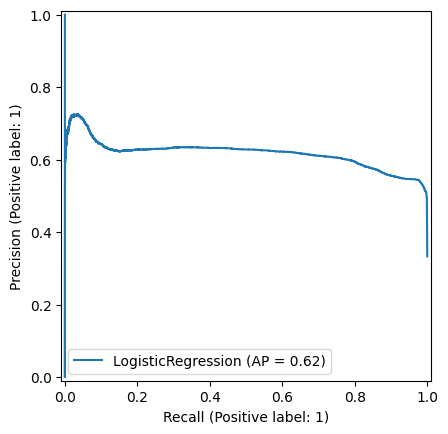


TEST REPORT 1
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     58551
           1       0.25      0.98      0.40      8143

    accuracy                           0.64     66694
   macro avg       0.62      0.78      0.57     66694
weighted avg       0.90      0.64      0.70     66694

The Log Loss function of the validation set corresponds to 0.3624758247495364



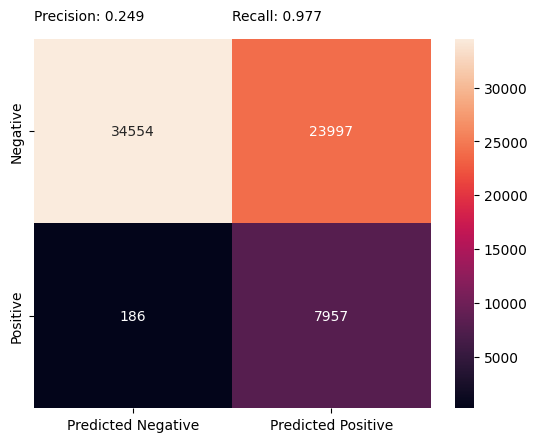

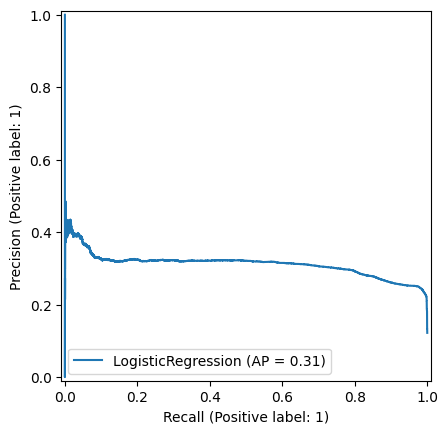

/tmp/ipython-input-7760272.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[cols_to_scale] = X_val[cols_to_scale].astype(float)



FOLD number 2 Oversampled Balanced

TRAIN REPORT 2
              precision    recall  f1-score   support

           0       0.99      0.56      0.71    175653
           1       0.53      0.99      0.69     87826

    accuracy                           0.70    263479
   macro avg       0.76      0.77      0.70    263479
weighted avg       0.84      0.70      0.70    263479

The Log Loss function of the training set corresponds to 0.4654628662558846



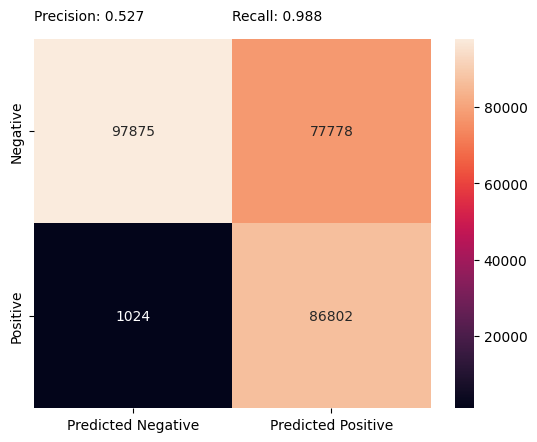

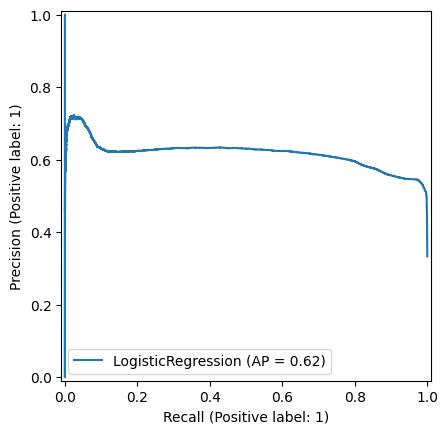


TEST REPORT 2
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     58551
           1       0.24      0.99      0.38      8143

    accuracy                           0.61     66694
   macro avg       0.62      0.77      0.55     66694
weighted avg       0.90      0.61      0.68     66694

The Log Loss function of the validation set corresponds to 0.49217610801671463



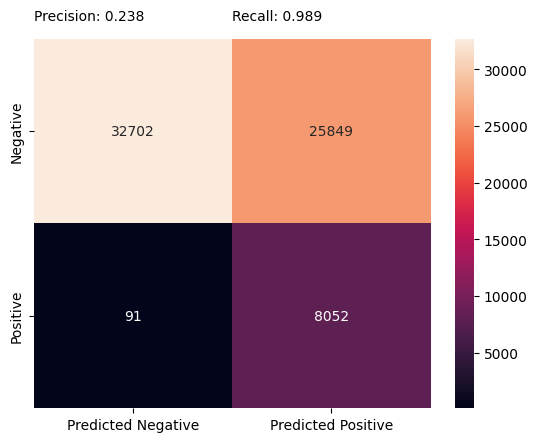

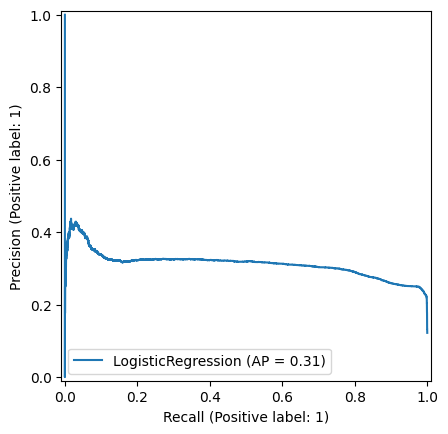

/tmp/ipython-input-7760272.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cv[cols_to_scale] = X_train_cv[cols_to_scale].astype(float)
/tmp/ipython-input-7760272.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[cols_to_scale] = X_val[cols_to_scale].astype(float)



FOLD number 3 Not Oversampled Not Balanced

TRAIN REPORT 3
              precision    recall  f1-score   support

           0       0.96      0.72      0.83    175653
           1       0.29      0.80      0.42     24429

    accuracy                           0.73    200082
   macro avg       0.63      0.76      0.63    200082
weighted avg       0.88      0.73      0.78    200082

The Log Loss function of the training set corresponds to 0.27668659977373244



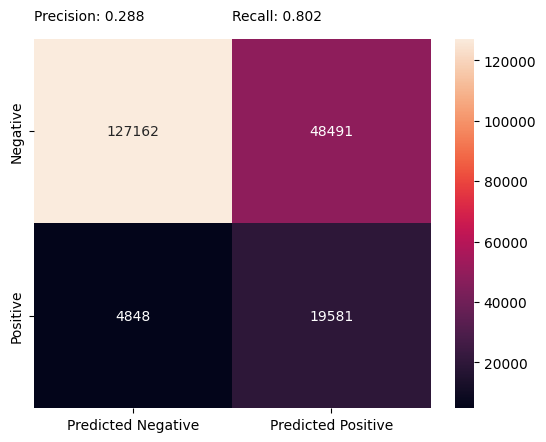

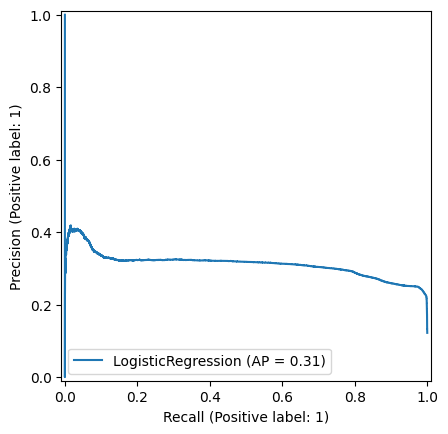


TEST REPORT 3
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     58551
           1       0.29      0.81      0.43      8143

    accuracy                           0.73     66694
   macro avg       0.63      0.77      0.63     66694
weighted avg       0.88      0.73      0.78     66694

The Log Loss function of the validation set corresponds to 0.2753779744556664



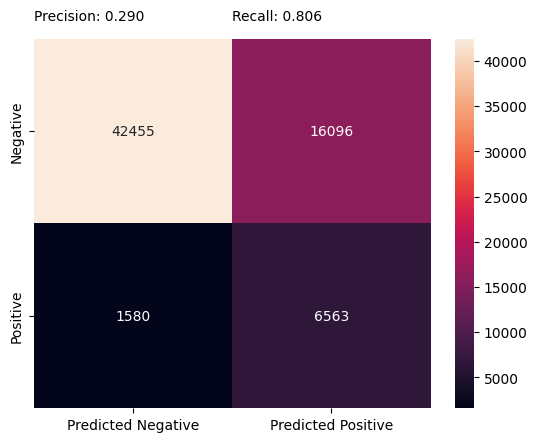

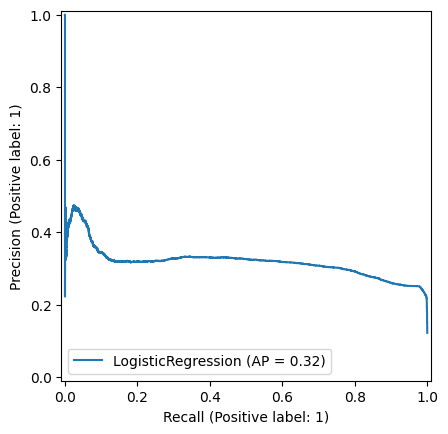

/tmp/ipython-input-7760272.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cv[cols_to_scale] = X_train_cv[cols_to_scale].astype(float)
/tmp/ipython-input-7760272.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[cols_to_scale] = X_val[cols_to_scale].astype(float)



FOLD number 4 Not Oversampled Balanced

TRAIN REPORT 4
              precision    recall  f1-score   support

           0       1.00      0.56      0.72    175653
           1       0.24      0.99      0.38     24429

    accuracy                           0.61    200082
   macro avg       0.62      0.77      0.55    200082
weighted avg       0.90      0.61      0.68    200082

The Log Loss function of the training set corresponds to 0.49086669694107277



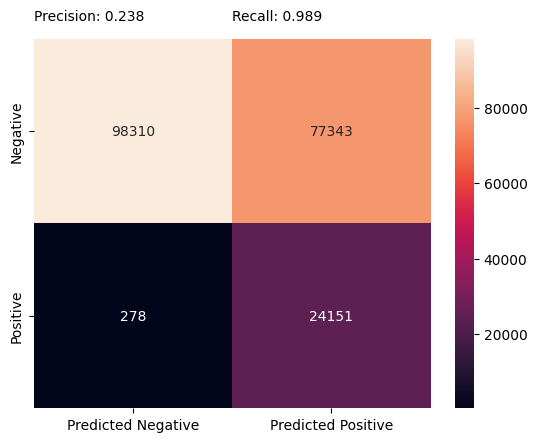

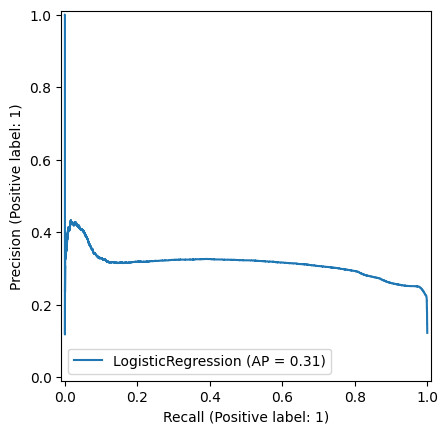


TEST REPORT 4
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     58551
           1       0.24      0.99      0.38      8143

    accuracy                           0.61     66694
   macro avg       0.62      0.77      0.55     66694
weighted avg       0.90      0.61      0.67     66694

The Log Loss function of the validation set corresponds to 0.4929782346532093



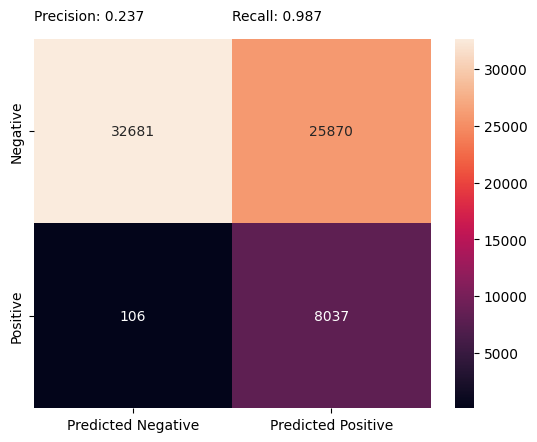

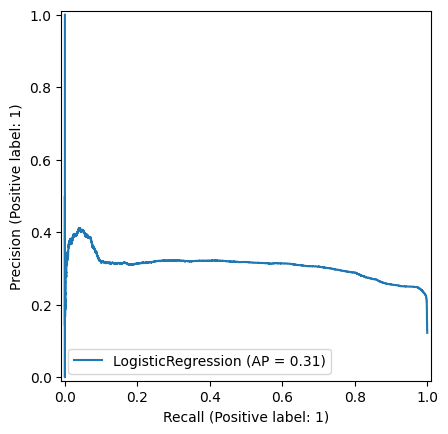

In [80]:
train_score = []
val_score = []


# K-FOLD CROSS-VALIDATION:
for fold, (train_index, val_index) in enumerate(skf.split(X_train,y_train),1):
    X_train_cv, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val = y_train.iloc[train_index], y_train.iloc[val_index]


    # RESAMPLING:
    if fold < 3:
      X_train_cv, y_train_cv = oversample.fit_resample(X_train_cv, y_train_cv)


    # FEATURE ENCODING:
    le = LabelEncoder()

    # 'Gender'encoding
    X_train_cv.loc[:,"Gender"] = le.fit_transform(X_train_cv["Gender"])
    X_val.loc[:,'Gender'] = le.transform(X_val['Gender'])

    # 'Vehichle Age'encoding.
    va_mapping={"< 1 Year":1,"1-2 Year":2, "> 2 Years":3}
    X_train_cv.loc[:,"Vehicle_Age"] = X_train_cv["Vehicle_Age"].map(lambda t:va_mapping[t])
    X_val.loc[:,"Vehicle_Age"] = X_val["Vehicle_Age"].map(lambda t:va_mapping[t])

    # 'Vehicle Damage' encoding
    X_train_cv.loc[:,'Vehicle_Damage'] = le.fit_transform(X_train_cv['Vehicle_Damage'])
    X_val.loc[:,'Vehicle_Damage'] = le.transform(X_val['Vehicle_Damage'])


    # STANDARDIZATION:
    cols_to_scale = ['Age','Annual_Premium','Vintage']
    X_train_cv[cols_to_scale] = X_train_cv[cols_to_scale].astype(float)
    X_val[cols_to_scale] = X_val[cols_to_scale].astype(float)
    ss = StandardScaler()
    X_train_cv.loc[:,cols_to_scale] = ss.fit_transform(X_train_cv[cols_to_scale])
    X_val.loc[:,cols_to_scale] = ss.transform(X_val[cols_to_scale])


    # LOGISTIC REGRESSION:
    if fold%2 == 1:
      lr = LogisticRegression(max_iter=1000, random_state = 42, penalty = None)
    elif fold%2 == 0:
      lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state = 42, penalty = None)

    lr.fit(X_train_cv, y_train_cv)


    # ELABORATION OF PREDICTED VALUES, ASSOCIATED PROBABILITIES,
    # AND MODEL METRICS: due to the class distribution imbalance a threshold of
    # 0.2 rather than 0.5 is set for proability calculation
    y_proba_train = lr.predict_proba(X_train_cv)
    y_proba_val = lr.predict_proba(X_val)
    y_pred_train = np.where(y_proba_train[:,1] > 0.2, 1,0)
    y_pred_val = np.where(y_proba_val[:,1] > 0.2, 1,0)

    log_loss_train = log_loss(y_train_cv, y_proba_train)
    train_score.append(log_loss_train)
    log_loss_val = log_loss(y_val, y_proba_val)
    val_score.append(log_loss_val)

    print(f"\nFOLD number {fold}","Oversampled" if fold < 3 else "Not Oversampled",
          "Not Balanced" if fold%2==1 else "Balanced")
    print(f"\nTRAIN REPORT {fold}")
    print(classification_report(y_train_cv, y_pred_train))
    print(f"The Log Loss function of the training set corresponds to {train_score[fold-1]}\n")
    plot_confusion_matrix(y_train_cv,y_pred_train)
    PrecisionRecallDisplay.from_estimator(lr, X_train_cv, y_train_cv)
    plt.show()

    print(f"\nTEST REPORT {fold}")
    print(classification_report(y_val, y_pred_val))
    print(f"The Log Loss function of the validation set corresponds to {val_score[fold-1]}\n")
    plot_confusion_matrix(y_val,y_pred_val)
    PrecisionRecallDisplay.from_estimator(lr, X_val,y_val)
    plt.show()



scores = {f"train_score: {np.round(train_score,2)}", f"test_score: {np.round(val_score,2)}"}

In [81]:
scores

{'test_score: [0.36 0.49 0.28 0.49]', 'train_score: [0.43 0.47 0.28 0.49]'}

### 2.3. CONSIDERATIONS ABOUT THE MODEL

>>From this preliminary evaluation, it can be concluded that the best Logistic Regression model for classifying clients’ response to the cross-selling policy is the third model, which neither applied oversampling nor adjusted for class weights. However, establishing the superiority of one model over others requires a holistic approach that considers not only accuracy but also generalizability and robustness across datasets.


#### 2.3.1. LOG LOSS
Log Loss (or Logistic Loss) is a widely used cost function in classification tasks. It evaluates the performance of a model by penalizing incorrect predictions more heavily. Importantly, Log Loss is a valuable diagnostic tool for detecting underfitting or overfitting, depending on how it varies between the training and validation sets.

>>>1) Train vs Validation (0.43 vs 0.36)</br>
Since the Log Loss decreases when moving from the training to the validation set, the model possibly lacks the capacity to capture the underlying data complexity, indicating underfitting. A potential remedy could be to incorporate more features or increase model complexity.

>>>2) Train vs Validation (0.47 vs 0.49)</br>
There is a minor increase in Log Loss in the validation set compared to training. Additionally, both Log Loss values are higher than the previous case, indicating this model is, overall, less performant.

>>>3) Train vs Validation (0.28 vs 0.28)</br>
This fold shows the lowest values of Log Loss overall and nearly identical performance across train and validation sets. This indicates both high performance and good model generalization. If we focus solely on Log Loss as our evaluation metric, this model appears to be the most effective.

>>>4) Train vs Validation (0.49 vs 0.49)</br>
This fold shows consistent Log Loss between train and validation sets, but both values are extremely high. Despite the stability (which would typically suggest no overfitting), the absolute performance is poor. This iteration seems to be the least performant, according to the Log Loss metric.


#### 2.3.2. FURTHER CLASSIFICATION METRICS


>>>When dealing with classification tasks, a common tool for assessing model performance and errors is the Confusion Matrix. Briefly, it is a matrix that compares the actual class labels of a variable with the predictions made by the model. Using this tool, it is possible to determine:
>>>* TRUE POSITIVES (TP): observations clasified as positive that are truly positive;
>>>* TRUE NEGATIVES (TN): observations clasified as negativee that are truly negative;
>>>* FALSE POSITIVES (FP): observations clasified as positive that are negative;
>>>* FALSE NEGATIVES (FN): observations clasified as negative that are not positive;

>>>From these basic metrics, additional indices can be derived to provide more detailed insight into model performance:</br>
>>>* *ACCURACY*: $A = (TP+TN)/(TP+FP+TN+FN)$ that describes the overall corectness of the model;</br>
>>>* *PRECISION*: $TP/(TP+FP)$ which indicates the amount of actual positives observations present among the positively classified observations;</br>
>>>* *SENSITIVITY (RECALL)*: $TP/(TP+FN)$ representing the number of positive observations that the model classified as positives; </br>
>>>* *F1*: index that summarizes Recall and Precision;



>>>Each of the four models efficiently classifies observations belonging to the minority class, with recall values ranging from 0.81 to 0.99 on both the training and validation sets. However, all models struggle with correctly classifying the majority class, where recall ranges from 0.56 to 0.73 across both sets.</br>

>>>* **Model 1 (Oversampling, no class-weight adjustment)**: Performs strongly on the majority class, achieving high precision (0.98–0.99) and moderate recall (0.59) on both training and validation sets. However, precision for the minority class drops notably when moving from training to validation (0.54 to 0.25), while sensitivity (recall) remains stable at 0.98;

>>>* **Model 2 (Oversampling with class-weight adjustment)**: Similar to Model 1, it performed well on the majority class in both training and validation sets (precision 0.99–1.0, recall 0.56). However, precision for the minority class dropped significantly when moving from training to validation (0.53 to 0.24), while recall remained consistently high (0.99);

>>>* **Model 3 (No oversampling, no class-weight adjustment)**: This model emerged as the most stable across training and validation sets and was the most balanced in terms of classification metrics. Compared to previous models, Model 3 shows a slight improvement in negative-class sensitivity (recall 0.72 to 0.73) while maintaining similar precision (0.96). For the positive class, recall decreases slightly (0.83), but precision reaches its highest value among all models (0.29);


>>>* **Model 4 (No oversampling, with class-weight adjustment)**: This model maintains the stability observed in Model 3; however, it exhibits the lowest precision for the minority class across all models (0.24).

>>>The significant decrease in precision observed in Models 1 and 2 when moving from training to validation suggests that oversampling did not work as expected. Indeed, the resampling strategy applied solely to the training set may have been beneficial for that specific subset of data, but it penalized model performance on the validation set.</br> Conversely, although Model 3 performs slightly worse than Models 1 and 2 on the training set, it generalizes much better, producing more reliable results during validation. In terms of Average Precision (AP), the precision-recall equivalent of ROC AUC, Model 3 achieves a similar performance to the other models on the validation set, with an AP of 0.32.</br> Notably, the Precision-Recall curves for all models display a sharp increase in precision when recall is near zero, indicating high precision at very low sensitivity, which then rapidly declines as recall increases. This behavior is typical in imbalanced datasets such as this one.


#### 2.3.3. GLOBAL SCORE

>>>As anticipated, Model 3 is considered the best according to the criteria utilized for ranking:
>>>1) Log Loss metric that describes global performances and it is sensitive to Overfitting/Underfitting presence - lower cost function and stable between sets;

>>>2) Confusion Matrix derived metrics - most balanced model considering minority and majority class labelling, and higher overall accuracy;</br>

>>>Apparently, none of the strategies aimed at counterbalancing the skewed class distribution, namely oversampling and/or using balanced class weights, substantially improved model performance. Oversampling alone enhanced performance on the training set but failed to translate this advantage to the validation set. Notably, the inefficacy of oversampling persisted even when combined with the class-weight balancing parameter. Interestingly, using class-weight balancing alone proved to be the least effective strategy in terms of classification scores.

### 2.4. FINAL TESTING


TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.73      0.83    234204
           1       0.29      0.80      0.42     32572

    accuracy                           0.74    266776
   macro avg       0.63      0.76      0.63    266776
weighted avg       0.88      0.74      0.78    266776

The Log Loss function of the training set corresponds to 0.27635296785013685



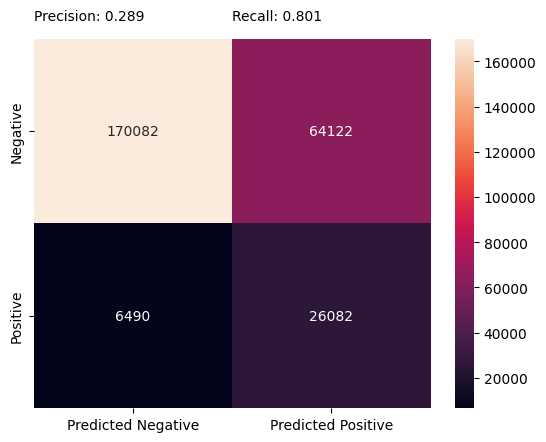

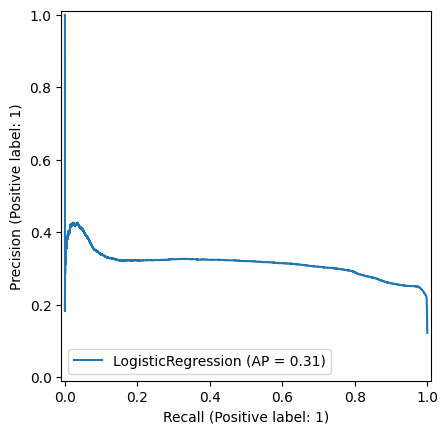


TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.73      0.83    100195
           1       0.29      0.80      0.43     14138

    accuracy                           0.74    114333
   macro avg       0.63      0.77      0.63    114333
weighted avg       0.88      0.74      0.78    114333

The Log Loss function of the testing set corresponds to 0.2773095162447748



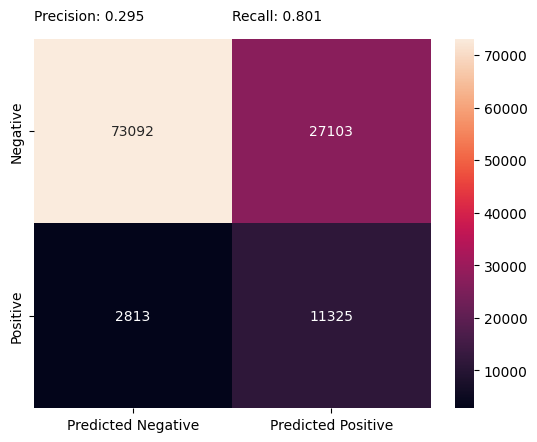

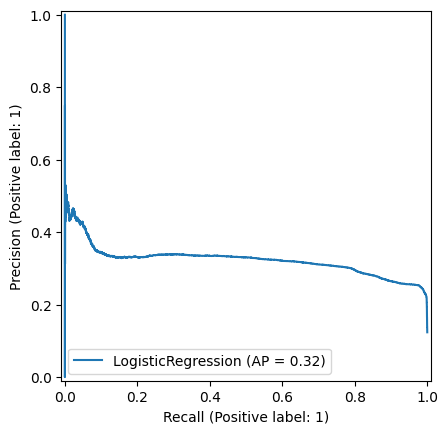

In [82]:
# FEATURE ENCODING: as a first step, an Encoder is imported from scikit-learn.
le = LabelEncoder()

# 'Gender' is a categorical nominal feature.
X_train["Gender"] = le.fit_transform(X_train["Gender"])
X_test['Gender'] = le.transform(X_test['Gender'])

# 'Vehichle Age'is a categorical features with ordinal classes. Ordinal Encoding is applied.
va_mapping={"< 1 Year":1,"1-2 Year":2, "> 2 Years":3}
X_train["Vehicle_Age"] = X_train["Vehicle_Age"].map(lambda t:va_mapping[t])
X_test["Vehicle_Age"] = X_test["Vehicle_Age"].map(lambda t:va_mapping[t])

# 'Vehicle Damage' is a categorical nominal feature with only two classes.
X_train['Vehicle_Damage'] = le.fit_transform(X_train['Vehicle_Damage'])
X_test['Vehicle_Damage'] = le.transform(X_test['Vehicle_Damage'])

cols_to_scale = ['Age','Annual_Premium','Vintage']
X_train[cols_to_scale] = X_train[cols_to_scale].astype(float)
X_test[cols_to_scale] = X_test[cols_to_scale].astype(float)
ss = StandardScaler()
X_train[cols_to_scale] = ss.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = ss.transform(X_test[cols_to_scale])


# LOGISTIC REGRESSION:
lr = LogisticRegression(max_iter=1000, random_state = 42, penalty = None)
lr.fit(X_train, y_train)


# ELABORATION OF PREDICTED VALUES, ASSOCIATED PROBABILITIES, AND model metrics:
y_proba_train = lr.predict_proba(X_train)
y_proba_test = lr.predict_proba(X_test)
y_pred_train = np.where(y_proba_train[:,1] > 0.2, 1,0)
y_pred_test = np.where(y_proba_test[:,1] > 0.2, 1,0)

log_loss_train = log_loss(y_train, y_proba_train)
log_loss_test = log_loss(y_test, y_proba_test)

print(f"\nTRAIN REPORT")
print(classification_report(y_train, y_pred_train))
print(f"The Log Loss function of the training set corresponds to {log_loss_train}\n")
plot_confusion_matrix(y_train,y_pred_train)
PrecisionRecallDisplay.from_estimator(lr, X_train, y_train)
plt.show()

print(f"\nTEST REPORT")
print(classification_report(y_test, y_pred_test))
print(f"The Log Loss function of the testing set corresponds to {log_loss_test}\n")
plot_confusion_matrix(y_test,y_pred_test)
PrecisionRecallDisplay.from_estimator(lr, X_test,y_test)
plt.show()

>>>The final test of the model mirrors the metrics obtained during the validation phase, showing an accuracy of 0.74 on both training and test sets, sensitivity of 0.73/0.80, precision of 0.96/0.29, and an Average Precision (AP) of 0.31. No overfitting is observed, as indicated by the identical Log Loss values for train and test sets (0.27 vs. 0.27).</br>

>>>Despite these results on a larger dataset, it cannot be concluded that the model provides a fully reliable tool for classifying clients likely to purchase the cross-selling policy. While the model explored several strategies to address class imbalance, this characteristic heavily impacts overall performance. Specifically, although test set accuracy is 0.74, fewer than 30% of the observations predicted as positive are actually positive. This means that approximately 70% of negative observations are incorrectly labeled as positive. This issue occurs despite a relatively high recall of 0.80, indicating that most true positives are correctly identified.
Consequently, the negative class is also interested by a suboptimal sensitivity of 0.73, despite the high precision (0.96).

>>>Potential strategies to improve model performance include:

>>>* Increasing the number of observations representing clients who have already accepted the cross-selling offer.

>>>* Exploring alternative models that are more robust to class imbalance.